### Read and explore the datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quilt
import seaborn as sns
import missingno as msno
import plotly.offline
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
import cufflinks
#import geopandas as gp
#init_notebook_mode

# pip install cufflinks
# pip install plotly_express
# cufflinks.__version__
# pip install cufflinks --upgrade
# pip install python-quilt
# pip install missingno

In [17]:
#Read datasets, no description available. ALl files available at 
# http://www.tsb.gc.ca/eng/stats/aviation/data-5.html. Adding conditions as warning
# received: Columns (+30 in total)have mixed types. Specify dtype option on 
# import or set low_memory=False.


df1 = pd.read_csv('ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv') 
#                   sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df2 = pd.read_csv('ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv')
#                  sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#df3 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
#df4 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
dfo = pd.read_csv('23100018.csv')

In [18]:
#Rename occid
df2 = df2.rename(index=str, columns={"occid": "OccID"})

In [19]:
print(df2.shape)
df2.head(2)

(57227, 194)


,OccID,OccNo,AcID,AircraftID,AircraftVersion,RowStatus,RegistrationNo,SerialNo,AircraftTypeID,AircraftTypeID_DisplayEng,...,ReqSepTime,ActualSepHorizontal,ActualSepHorizontalEnum,ActualSepHorizontalEnum_DisplayEng,ActualSepHorizontalEnum_DisplayFre,ActualSepVertical,ActualSepTime,AtsUnitInvolvedEnum,AtsUnitInvolvedEnum_DisplayEng,AtsUnitInvolvedEnum_DisplayFre
0,152828,A19P0071,43955,106710,9.0,1,C-GJAZ,15036,1.0,AEROPLANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152827,A19W0070,67261,131335,2.0,1,C-FANF,27417,1.0,AEROPLANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2.columns

Index(['OccID', 'OccNo', 'AcID', 'AircraftID', 'AircraftVersion', 'RowStatus',
       'RegistrationNo', 'SerialNo', 'AircraftTypeID',
       'AircraftTypeID_DisplayEng',
       ...
       'ReqSepTime', 'ActualSepHorizontal', 'ActualSepHorizontalEnum',
       'ActualSepHorizontalEnum_DisplayEng',
       'ActualSepHorizontalEnum_DisplayFre', 'ActualSepVertical',
       'ActualSepTime', 'AtsUnitInvolvedEnum',
       'AtsUnitInvolvedEnum_DisplayEng', 'AtsUnitInvolvedEnum_DisplayFre'],
      dtype='object', length=194)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57227 entries, 0 to 57226
Columns: 194 entries, OccID to AtsUnitInvolvedEnum_DisplayFre
dtypes: float64(79), int64(4), object(111)
memory usage: 85.1+ MB


In [22]:
df2u = df2.OccID.nunique()
print (df2u)

43854


In [23]:
# dfa_.reset_index().drop_duplicates().set_index(['OccId']) Doesn't work!

In [24]:
df1.shape

(47226, 246)

In [25]:
df1.head(2)

,OccID,OccNo,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,InitialPositionEnum_DisplayFre,FinalPositionEnum,FinalPositionEnum_DisplayEng,FinalPositionEnum_DisplayFre,FullProcedureIND,FullProcedureIND_DisplayEng,FullProcedureIND_DisplayFre,SurfaceContaminationID,SurfaceContaminationID_DisplayEng,SurfaceContaminationID_DisplayFre
0,152828,A19P0071,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df1.columns

Index(['OccID', 'OccNo', 'AirportID', 'AirportID_AirportName',
       'AirportID_CountryID', 'AirportID_CountryID_DisplayEng',
       'AirportID_CountryID_DisplayFre', 'Airport_ProvinceID',
       'AirportID_ProvinceID_DisplayEng', 'AirportID_ProvinceID_DisplayFre',
       ...
       'InitialPositionEnum_DisplayFre', 'FinalPositionEnum',
       'FinalPositionEnum_DisplayEng', 'FinalPositionEnum_DisplayFre',
       'FullProcedureIND', 'FullProcedureIND_DisplayEng',
       'FullProcedureIND_DisplayFre', 'SurfaceContaminationID',
       'SurfaceContaminationID_DisplayEng',
       'SurfaceContaminationID_DisplayFre'],
      dtype='object', length=246)

### Finding unique values on datasets

In [27]:
df1u = df1.OccID.nunique()

In [28]:
unique_ = pd.DataFrame({'Dataset' :["AC","EVE"],#"OCC","SUR"], 
                        "Unique":[df1u,df2u]})#df3u,df4u
unique_.sort_values(by="Unique", ascending=False)

,Dataset,Unique
0,AC,43855
1,EVE,43854


### Merging the two datasets with accidents information

In [30]:
dfm = df1.merge(df2, how='left', left_on=('OccID','OccNo'), right_on=('OccID','OccNo'))

In [31]:
dfm.shape #dfm.TotalFatalCount

(68258, 438)

### Preprocessing dataset with information about movements

In [32]:
dfo.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Class of operation',
       'Rank and number of movements', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')

In [33]:
tot = dfo.groupby(['GEO', 'Class of operation'])

In [34]:
tot.first()

REF_DATE  \
GEO                                                Class of operation                               
Abbotsford, British Columbia                       Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Alberta                                            Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Boundary Bay, British Columbia                     Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
British Columbia                                   Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Calgary International, Alberta                     Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Calgary/Springbank, Alberta                        Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Chicoutimi/St-Honoré, Quebec                       Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Edmonton City Centre, Alberta                      Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Edmonton International, Alberta                    Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Edmonton/Villeneuve, Alberta                       Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
...                                                                                           ...   
Total Canadian airports                            Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Vancouver Harbour, British Columbia                Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Vancouver International, British Columbia          Itinerant movements                       1997   
                                                 

In [ ]:
f

In [36]:
tot.get_group('Total Canadian airports')

ValueError: must supply a tuple to get_group with multiple grouping keys

In [ ]:
# from functools import reduce
# dfm = reduce(lambda left,right: pd.merge(left,right, on='OccID',how='inner'), dfs)

In [ ]:
dfm.shape

In [ ]:
dfm.drop_duplicates(subset ="OccID", 
                     keep = False, inplace = True) 
#df.dropna(inplace = True)

In [ ]:
msno.matrix(dfm)

In [ ]:
dfm.shape

In [ ]:
dfm.Latitude.isnull().sum()

In [ ]:
dfm.Latitude.fillna(0, inplace=True)

In [ ]:
dfm.Longitude.fillna(0, inplace=True)

In [ ]:
dfp = dfm.drop(dfm.columns[dfm.apply(lambda col: col.isnull().sum() > 200)], axis=1)

In [ ]:
dfp.shape

In [ ]:
msno.matrix(dfp)

In [ ]:
dfp.columns

In [ ]:
Long = dfm.Longitude * -1

In [ ]:
sns.jointplot(x=Long.values, y=dfp.Latitude.values, size = 10)
plt.title('Lat and Longs')

In [ ]:
dfp.sample(5)

In [ ]:
dfp['OccDate'] = le.fit_transform(dfp['OccDate'].astype(str))
LabelEncoder()
le.classes_
dfp['OccDate'] = pd.to_datetime(dfp['OccDate'])

In [ ]:
dfp.shape


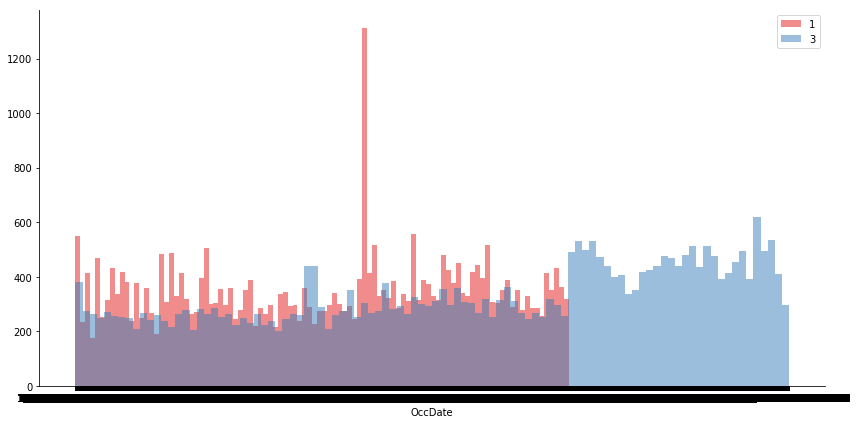

In [54]:
g = sns.FacetGrid(dfp,hue='OccTypeID',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'OccDate',bins=100,alpha=0.5)
plt.legend()

In [55]:
#df = pd.to_datetime(df['OccDate'], errors='coerce')


In [96]:
#importing plotly and cufflinks in offline mode
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [97]:
#Removed as there are few occurrences before 1976
#dfm.OccDate.dt.year.iplot(kind='histogram', bins=40, theme='white', title='Ocurrences per year')

In [98]:
# Drop prior to 1976
old = dfm[(dfm.OccDate.dt.year < 1976)].index
dfm.drop(old, inplace=True)

AttributeError: Can only use .dt accessor with datetimelike values

In [99]:
dfm.OccDate.dt.year.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per year')

AttributeError: Can only use .dt accessor with datetimelike values

In [100]:
#plt.hist(df['OccTypeID_DisplayEng']);
#sns.distplot( a=df["OccTypeID_DisplayEng"], hist=True, kde=False, rug=False )
#sns.scatter(x='OccTypeID_DisplayEng', data=df)
#px.bar(df, x='OccTypeID_DisplayEng', template='plotly_white')
#df.OccTypeID_DisplayEng.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per type')
#px.histogram(df, x='OperatorTypeID_DisplayEng', color='OccTypeID_DisplayEng',template='plotly')

In [ ]:
#px.histogram(, x='OrganizationID_DisplayEng', y='OccTypeID_DisplayEng') 
sns.distplot(["OccTypeID"])

In [ ]:
# g = sns.FacetGrid(,hue='OccTypeID_DisplayEng',palette='Set1',size=8,aspect=2)
# g = g.map(plt.hist,'TotalFatalCount', bins=20,alpha=0.5)
# plt.legend()

In [ ]:
#dfen.TotalFatalCount

In [ ]:
dfa.corr('pearson')

In [ ]:
# sns.heatmap(dfa.isnull(), cbar=False)

In [ ]:
px.scatter(dfm, x='TotalFatalCount', y="OrganizationID_DisplayEng", 
                   size='TotalFatalCount', size_max=60)
#Get another graph for <100 fatalities

In [ ]:
plt.scatter(dfm.OccTypeID_DisplayEng, dfm.OperationTypeID_DisplayEng)
#Get another graph for <100 fatalities

### Preprocessing for classification and clustering

In [ ]:
#Select relevant features, USE df=df[]!!!! Remove index for model setup
dfa = dfm[['OccID','AircraftTypeID','AircraftMakeID','OrganizationID', 'OperationTypeID',
           'OperatorTypeID', 'WeightCategoryID','YearOfManuf','NumberOfEngine', 
          'MaxTakeOffWeight','NumberOfEngine', 'OccDate', 'OccTime','Latitude','Longitude', 
           'DamageLevelID','WakeTurbulenceCategoryID', 'DangerousGoodEnum',
           'TotalFatalCount', 'OccTypeID']]#'DepartAirportID','DestAirportID','LandingGearID'
dfa.head()

In [ ]:
dfa.shape

In [ ]:
dfa.info()

In [ ]:
dfa.drop_duplicates(subset ="OccID", 
                     keep = False, inplace = True) 
#df.dropna(inplace = True)

In [ ]:
dfa = dfa.drop(['OccID'], axis=1)

In [61]:
dfa.shape

NameError: name 'dfa' is not defined

In [62]:
msno.matrix(dfa)

NameError: name 'dfa' is not defined

In [63]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# instantiate labelencoder object
le = LabelEncoder()

In [ ]:
dfa.fillna(0, inplace=True)

In [ ]:
dfa

In [ ]:
#  = .replace('', np.nan)

In [ ]:
dfa.isnull().sum()


In [ ]:
# .isnan().sum()

In [ ]:
# le[fit..AircraftTypeID_DisplayEng]
# list(le.classes_)
# #le.transform(df['AircraftTypeID_DisplayEng'])

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# # ['AircraftTypeID_DisplayEng']
# # le.fit(['AircraftTypeID_DisplayEng'])
# # ['AircraftTypeID_DisplayEng'] = le.fit_transform(['AircraftTypeID_DisplayEng'].astype(str))
# # LabelEncoder()
# # le.classes_

# # array([1, 2, 6])
# #le.transform(['AircraftTypeID_DisplayEng'].astype(str)) 
# # array([0, 0, 1, 2]...)
# # le.inverse_transform([0, 0, 1, 2])
# # array([1, 1, 2, 6])

In [ ]:
# ['AircraftMakeID_DisplayEng'] = le.fit_transform(['AircraftMakeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OrganizationID_DisplayEng'] = le.fit_transform(['OrganizationID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OperatorTypeID_DisplayEng'] = le.fit_transform(['OperatorTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OperationTypeID_DisplayEng'] = le.fit_transform(['OperationTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OccTypeID_DisplayEng'] = le.fit_transform(['OccTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['YearOfManuf'] = le.fit_transform(['YearOfManuf'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
#Finding missing values on YearofManuf
# .YearOfManuf.isnull().sum().sum()

In [ ]:
# from sklearn.impute import SimpleImputer

In [ ]:
# imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')

In [ ]:
#  = imp.fit_transform(.values)

In [ ]:
dfa.head()

In [ ]:
# from sklearn_pandas import CategoricalImputer
# data = 
# imputer = CategoricalImputer()
# imputer.fit_transform(data)


In [ ]:
# #Removing timestamp from OccDate
# ['OccDate'] = pd.to_datetime(['OccDate'])


In [ ]:
dfa['YearOfManuf'] = le.fit_transform(dfa['YearOfManuf'].astype(str))
LabelEncoder()
le.classes_

In [ ]:
dfa['YearOfManuf'] = pd.to_numeric(dfa['YearOfManuf'])

In [59]:
dfa['OccDate'] = le.fit_transform(dfa['OccDate'].astype(str))
LabelEncoder()
le.classes_

NameError: name 'le' is not defined

In [60]:
#dfa['OccDate'] = pd.to_datetime(dfa['OccDate'])

In [126]:
dfa['OccTime'] = le.fit_transform(dfa['OccTime'].astype(str))
LabelEncoder()
le.classes_

array(['0', '00:00:00', '00:01:00', ..., '23:57:00', '23:58:00',
       '23:59:00'], dtype=object)

In [127]:
#dfa['OccTime'] = pd.to_numeric(dfa['OccTime'])

In [128]:
#Create new column with only Date
dfm['Date'] = dfm['OccDate'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [129]:
# = imp.fit_transform() 

In [130]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35440 entries, 0 to 68257
Data columns (total 19 columns):
AircraftTypeID              35440 non-null float64
AircraftMakeID              35440 non-null float64
OrganizationID              35440 non-null float64
OperationTypeID             35440 non-null float64
OperatorTypeID              35440 non-null float64
WeightCategoryID            35440 non-null float64
YearOfManuf                 35440 non-null int32
NumberOfEngine              35440 non-null float64
MaxTakeOffWeight            35440 non-null float64
NumberOfEngine              35440 non-null float64
OccDate                     35440 non-null int32
OccTime                     35440 non-null int32
Latitude                    35440 non-null float64
Longitude                   35440 non-null float64
DamageLevelID               35440 non-null float64
WakeTurbulenceCategoryID    35440 non-null float64
DangerousGoodEnum           35440 non-null float64
TotalFatalCount             35

In [131]:
#Inferring dtypes
#  = .infer_objects()
# .dtypes

In [132]:
dfa.shape

(35440, 19)

In [133]:
# print ([pd.to_numeric(.OccTypeID_DisplayEng, errors='coerce').isnull()])
# #pd.to_numeric(df['OccTypeID_DisplayEng'])

In [134]:
# non_numeric = df.OrganizationID_DisplayEng.compile(r'[^\d.]+')
# #df = pd.DataFrame({'a': [3,2,'NA']})
# df.iloc[df['a'].str.contains(non_numeric)]

#print ([pd.to_numeric(.OccDate)])

In [135]:
# .OccTypeID_DisplayEng is bool

In [136]:
# .OccTypeID_DisplayEng is str

In [137]:
# .OccTypeID_DisplayEng is int

In [138]:
# .OccTypeID_DisplayEng is dict

In [139]:
#Total of missing values

dfa.isnull().sum().sum()

0

In [140]:
dfa.nunique()

AircraftTypeID                 13
AircraftMakeID                697
OrganizationID               3164
OperationTypeID                25
OperatorTypeID                  9
WeightCategoryID                6
YearOfManuf                   166
NumberOfEngine                  6
MaxTakeOffWeight             2131
NumberOfEngine                  6
OccDate                     13626
OccTime                      1410
Latitude                     3049
Longitude                    5396
DamageLevelID                   7
WakeTurbulenceCategoryID        5
DangerousGoodEnum               4
TotalFatalCount                19
OccTypeID                       2
dtype: int64

In [141]:
dfa.describe()

,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum,TotalFatalCount,OccTypeID
count,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000
mean,1.362641,50994.676016,40764.001749,3.057957,4.361766,2.631574,83.313544,1.724492,47226.190293,1.724492,7216.226749,804.050141,47.329831,88.692261,4.080389,1.577201,2.494018,0.087077,2.096840
std,1.133482,8171.439777,25723.306535,4.411957,1.293220,1.282392,44.853406,0.798110,98679.181070,0.798110,3937.527432,307.898707,10.757329,28.736080,1.182254,0.719475,0.510140,0.677262,0.995314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,50371.000000,0.000000,1.000000,4.000000,1.000000,58.000000,1.000000,1633.000000,1.000000,3828.000000,603.000000,45.000000,73.733333,4.000000,1.000000,2.000000,0.000000,1.000000
50%,1.000000,50443.000000,52099.000000,1.000000,5.000000,3.000000,90.000000,2.000000,7350.000000,2.000000,7634.000000,828.000000,49.033333,81.150000,4.000000,2.000000,2.000000,0.000000,3.000000
75%,1.000000,54377.000000,56580.000000,3.000000,5.000000,4.000000,116.000000,2.000000,51800.000000,2.000000,10641.000000,1028.000000,51.416667,114.016667,5.000000,2.000000,3.000000,0.000000,3.000000
max,12.000000,58458.000000,100517.000000,24.000000,8.000000,5.000000,165.000000,8.000000,892872.000000,8.000000,13625.000000,1409.000000,90.000000,180.000000,6.000000,4.000000,3.000000,62.000000,3.000000


### Classify using RFC

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
# x_columns = 13
# x = .iloc[:,0:x_columns].values 
# y = .iloc[:,x_columns].values
# print(y)
#IndexingError: Too many indexers

In [145]:
#Is target a class?
isinstance(dfa.OccTypeID, pd.DataFrame)

False

In [146]:
#RFC complaining nan, infinite or value too large, look for nan
# np.isnan(np.sum())

In [147]:
#Look for finite
# np.isfinite(np.sum())

In [148]:
# 1=.fillna(0)
# 1.isnull().any()

In [149]:
 dfa.dtypes

AircraftTypeID              float64
AircraftMakeID              float64
OrganizationID              float64
OperationTypeID             float64
OperatorTypeID              float64
WeightCategoryID            float64
YearOfManuf                   int32
NumberOfEngine              float64
MaxTakeOffWeight            float64
NumberOfEngine              float64
OccDate                       int32
OccTime                       int32
Latitude                    float64
Longitude                   float64
DamageLevelID               float64
WakeTurbulenceCategoryID    float64
DangerousGoodEnum           float64
TotalFatalCount               int64
OccTypeID                     int64
dtype: object

In [150]:
x=dfa.drop(columns=['OccTypeID', 'TotalFatalCount']) #features
y=dfa.OccTypeID#target

In [151]:
dfa.nunique()

AircraftTypeID                 13
AircraftMakeID                697
OrganizationID               3164
OperationTypeID                25
OperatorTypeID                  9
WeightCategoryID                6
YearOfManuf                   166
NumberOfEngine                  6
MaxTakeOffWeight             2131
NumberOfEngine                  6
OccDate                     13626
OccTime                      1410
Latitude                     3049
Longitude                    5396
DamageLevelID                   7
WakeTurbulenceCategoryID        5
DangerousGoodEnum               4
TotalFatalCount                19
OccTypeID                       2
dtype: int64

In [152]:
x.shape

(35440, 17)

In [153]:
y.shape

(35440,)

In [154]:
#print(y)

In [155]:
# encoder = LabelEncoder()
# # encoder.fit((x))
# # encoded_x = encoder.transform(x)
# # y.shape
# encoder.fit(y)
# encoded_y = encoder.transform(y)
# #dummy_y = np_utils.to_categorical(encoded_y,num_classes=7)
# # print(encoded_x)
# print(encoded_y)

In [156]:
# unique_y =df['OccTypeID_DisplayEng'].unique()
# print(unique_y)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6)

In [158]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0).fit(x_train, y_train)

In [159]:
dfa.dtypes

AircraftTypeID              float64
AircraftMakeID              float64
OrganizationID              float64
OperationTypeID             float64
OperatorTypeID              float64
WeightCategoryID            float64
YearOfManuf                   int32
NumberOfEngine              float64
MaxTakeOffWeight            float64
NumberOfEngine              float64
OccDate                       int32
OccTime                       int32
Latitude                    float64
Longitude                   float64
DamageLevelID               float64
WakeTurbulenceCategoryID    float64
DangerousGoodEnum           float64
TotalFatalCount               int64
OccTypeID                     int64
dtype: object

In [160]:
y_pred = model.predict(x_test)
print(y_pred)

[1 3 1 ... 3 3 1]


In [161]:
y_test

65909    1
28238    3
9262     1
63406    1
9378     1
67685    1
26977    3
54043    3
9582     3
61331    1
54735    3
27034    3
8499     1
56756    3
8851     3
39462    3
67064    1
13172    3
16419    3
35150    1
32310    1
4763     3
12339    1
15930    3
32132    1
35573    1
7662     3
66417    1
63264    1
62425    1
        ..
60960    1
31935    3
64846    1
9132     3
53695    3
51454    3
8857     3
9449     3
67453    1
22111    3
5070     3
12368    1
29307    1
3200     3
64728    1
5220     3
59802    1
54971    1
54113    3
18471    3
28018    3
35376    3
39526    3
61345    1
64850    1
61663    1
68010    1
59737    3
15765    3
14920    1
Name: OccTypeID, Length: 7088, dtype: int64

In [162]:
model.score(x_test, y_test)

0.9937923250564334

# Clustering

In [163]:
from sklearn import neighbors
from sklearn.cluster import KMeans

In [164]:
X_=x
sum_square = {}

for k in range(1, 10):
    kmeans_aviation = KMeans(n_clusters = k).fit(X_)
    sum_square[k] = kmeans_aviation.inertia_
print(X_.shape)
print(X_.columns)
print(X_.head)

(35440, 17)
Index(['AircraftTypeID', 'AircraftMakeID', 'OrganizationID', 'OperationTypeID',
       'OperatorTypeID', 'WeightCategoryID', 'YearOfManuf', 'NumberOfEngine',
       'MaxTakeOffWeight', 'NumberOfEngine', 'OccDate', 'OccTime', 'Latitude',
       'Longitude', 'DamageLevelID', 'WakeTurbulenceCategoryID',
       'DangerousGoodEnum'],
      dtype='object')
<bound method NDFrame.head of        AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
0                 1.0         56245.0         60343.0              1.0   
3                 3.0         56962.0         65347.0             16.0   
4                 1.0         53388.0         58286.0              1.0   
5                 3.0         56219.0        100517.0             22.0   
6                 1.0         50294.0         59873.0              1.0   
7                 0.0             0.0             0.0              0.0   
8                 1.0         50668.0         60218.0              1.0   
9            

In [165]:
X_.head()

,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum
0,1.0,56245.0,60343.0,1.0,5.0,4.0,143,2.0,38329.0,2.0,8865,788,56.550000,129.260000,4.0,2.0,3.0
3,3.0,56962.0,65347.0,16.0,5.0,3.0,53,2.0,8618.0,2.0,8199,693,52.185000,128.156667,4.0,2.0,2.0
4,1.0,53388.0,58286.0,1.0,5.0,4.0,119,2.0,75500.0,2.0,8907,853,49.194722,123.183889,4.0,2.0,3.0
5,3.0,56219.0,100517.0,22.0,5.0,2.0,127,1.0,2495.0,1.0,8865,753,58.276667,104.082500,4.0,1.0,2.0
6,1.0,50294.0,59873.0,1.0,5.0,4.0,162,2.0,79015.0,2.0,9945,783,49.910000,97.240000,4.0,2.0,2.0


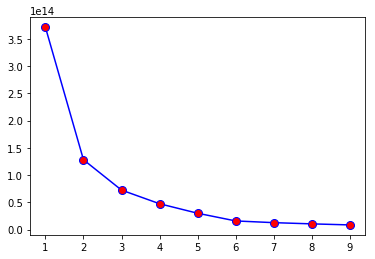

In [166]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'o', color = 'b',
         markersize = 8,markerfacecolor = 'r')

In [167]:
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_)
print('Cluster model K=5 inertia score is: ', kmeans_5.inertia_)
y=model.predict(X_)

Cluster model K=5 inertia score is:  30002951359742.94


In [168]:
centers5 = kmeans_5.cluster_centers_
centers5

array([[ 1.26314829e+00,  5.23104452e+04,  5.61957027e+04,
         3.13082151e+00,  4.59257401e+00,  2.87893993e+00,
         8.99606349e+01,  1.82014323e+00,  2.52549714e+04,
         1.82014323e+00,  6.90657351e+03,  7.99441865e+02,
         4.76712769e+01,  9.06974550e+01,  4.01546321e+00,
         1.58814943e+00,  2.56525111e+00],
       [ 1.00000000e+00,  5.13641102e+04,  5.16848158e+04,
         9.17383821e-01,  3.85025818e+00,  4.98278830e+00,
         6.86058520e+01,  3.47246127e+00,  3.49105582e+05,
         3.47246127e+00,  6.82631067e+03,  7.59629948e+02,
         4.41340265e+01,  6.98137512e+01,  3.67641997e+00,
         3.00000000e+00,  2.45008606e+00],
       [ 1.74253066e+00,  4.77981067e+04, -3.78349796e-09,
         3.75762659e+00,  3.93993081e+00,  1.33881958e+00,
         6.86781633e+01,  1.06478667e+00,  2.27221637e+03,
         1.06478667e+00,  8.08931943e+03,  8.36104309e+02,
         4.79985732e+01,  9.18127736e+01,  4.40004193e+00,
         9.87210399e-01,  2.3

In [169]:
dfa['klabels_5'] = kmeans_5.labels_

In [170]:
dfa.columns

Index(['AircraftTypeID', 'AircraftMakeID', 'OrganizationID', 'OperationTypeID',
       'OperatorTypeID', 'WeightCategoryID', 'YearOfManuf', 'NumberOfEngine',
       'MaxTakeOffWeight', 'NumberOfEngine', 'OccDate', 'OccTime', 'Latitude',
       'Longitude', 'DamageLevelID', 'WakeTurbulenceCategoryID',
       'DangerousGoodEnum', 'TotalFatalCount', 'OccTypeID', 'klabels_5'],
      dtype='object')

In [171]:
X_.head()
#X_.shape

,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum
0,1.0,56245.0,60343.0,1.0,5.0,4.0,143,2.0,38329.0,2.0,8865,788,56.550000,129.260000,4.0,2.0,3.0
3,3.0,56962.0,65347.0,16.0,5.0,3.0,53,2.0,8618.0,2.0,8199,693,52.185000,128.156667,4.0,2.0,2.0
4,1.0,53388.0,58286.0,1.0,5.0,4.0,119,2.0,75500.0,2.0,8907,853,49.194722,123.183889,4.0,2.0,3.0
5,3.0,56219.0,100517.0,22.0,5.0,2.0,127,1.0,2495.0,1.0,8865,753,58.276667,104.082500,4.0,1.0,2.0
6,1.0,50294.0,59873.0,1.0,5.0,4.0,162,2.0,79015.0,2.0,9945,783,49.910000,97.240000,4.0,2.0,2.0


NameError: name 'dfa' is not defined

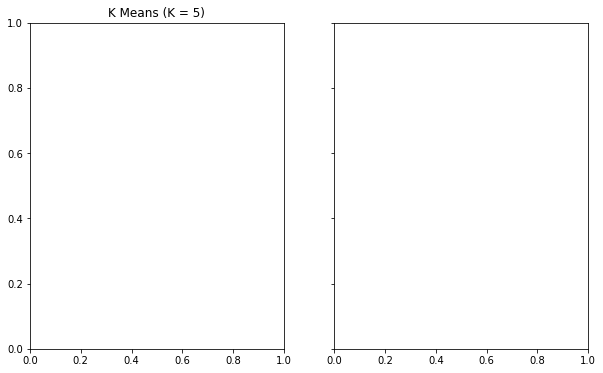

In [66]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 5)')
ax1.scatter(x = dfa['AircraftTypeID'], y = dfa['AircraftMakeID'], 
            c = ['klabels_5'], cmap='rainbow')
ax1.scatter(x=centers5[:, 0], y=centers5[:, 1],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = dfm['AircraftTypeID'], y = dfm['AircraftMakeID'], 
            c = ['AircraftMakeID'], cmap='rainbow')

In [173]:
Y=dfa["OccTypeID"]
y is your prediction
compare y and Y in the metrics

SyntaxError: invalid syntax (<ipython-input-173-769bf602a68a>, line 2)

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(['OccTypeID'], kmeans_5.labels_))

ValueError: Found input variables with inconsistent numbers of samples: [1, 35440]

In [175]:
X_.klabels_5.value_counts()

AttributeError: 'DataFrame' object has no attribute 'klabels_5'

In [ ]:
#y.unique

In [ ]:
x.columns

In [ ]:
x.head()

In [ ]:
x_test.shape

In [ ]:
.03*7088